Dataset Dimensions: (1599, 12)
Null Values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable para

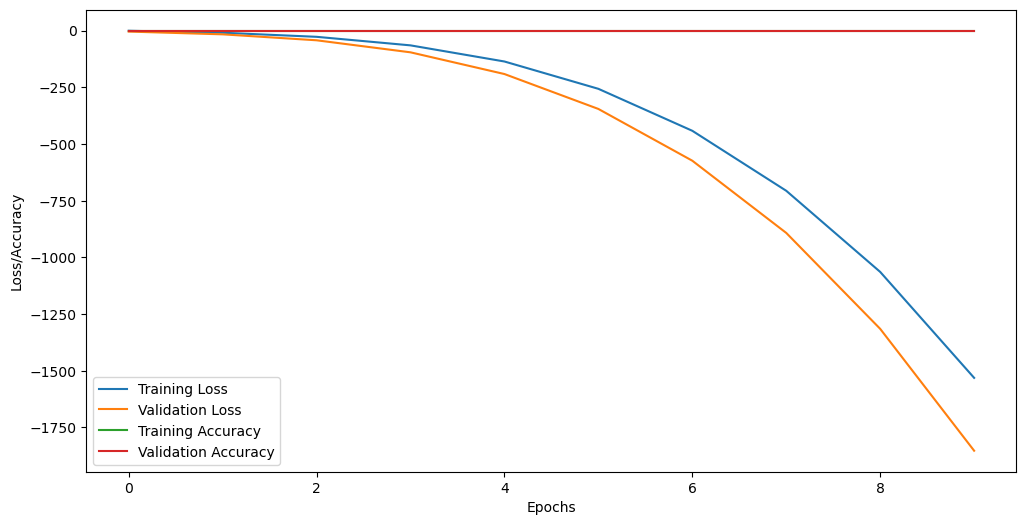

8/8 [==============================] - 0s 2ms/step - loss: -1924.4894 - accuracy: 0.0000e+00
Test Loss: -1924.4893798828125, Test Accuracy: 0.0


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Q1: Install and load the latest versions of TensorFlow and Keras.
# print("TensorFlow Version:", tf.__version__)
# print("Keras Version:", tf.keras.__version__)

# Q2: Load the Wine Quality dataset and explore its dimensions.
# Replace <DATASET_LINK> with the actual link to the dataset.
dataset_link = "datasets/winequality-red.csv"
wine_data = pd.read_csv(dataset_link)
print("Dataset Dimensions:", wine_data.shape)

# Q3: Check for null values, identify categorical variables, and encode them.
print("Null Values:\n", wine_data.isnull().sum())
categorical_columns = wine_data.select_dtypes(include=['object']).columns
wine_data = pd.get_dummies(wine_data, columns=categorical_columns, drop_first=True)

# Q4: Separate the features and target variables from the dataset.
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

# Q5: Perform a train-test split, dividing the data into training, validation, and test datasets.
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Q6: Scale the dataset using an appropriate scaling technique.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Q7: Design and implement at least two hidden layers and an output layer for the binary categorical variables.
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Q8: Create a Sequential model in Keras and add the previously designed layers to it.
# Q9: Print the summary of the model architecture.
model.summary()

# Q10: Set the loss function('binary_crossentropy'), optimizer, and include the accuracy metric in the model.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Q11: Compile the model with the specified loss function, optimizer, and metrics.

# Q12: Fit the model to the training data using an appropriate batch size and number of epochs.
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Q13: Obtain the model's parameters (weights and biases).
model_params = model.get_weights()

# Q14: Store the model's training history as a Pandas DataFrame.
history_df = pd.DataFrame(history.history)

# Q15: Plot the training history (e.g., accuracy and loss) using suitable visualization techniques.
plt.figure(figsize=(12, 6))
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

# Q16: Evaluate the model's performance using the test dataset and report relevant metrics.
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")
